   Top 5 Investors  No. of Investment in Different Startup
0  Sequoia Capital                                      45
1   Accel Partners                                      43
2  Kalaari Capital                                      35
3   Blume Ventures                                      26
4    SAIF Partners                                      24
[45, 43, 35, 26, 24]


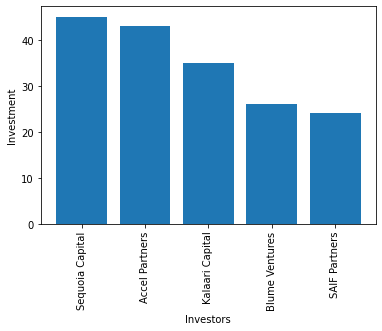

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)


# Creating data frame consisting of only 2 columns "StartupName" and "InvestorsName"
# Dropping NA values

df = df[["StartupName","InvestorsName", 'InvestmentType']]
df.dropna(inplace=True)
ab = df[df["InvestmentType"] == 'Private Equity']  


# Creating 2 list for StartupName and InvestorsName

startup_name=list(ab["StartupName"].values)
investor_name=list(ab["InvestorsName"].values)

# Traversing in the investor_name list , splitting by "," and applying the strip()
i=0
while i<len(investor_name):
    if ',' in investor_name[i] :
        l1 = investor_name[i].split(',')
        j = i 
        investor_name[j] = l1[0]
        j = j + 1
        for k in range(1,len(l1)): 
            investor_name.insert(j,l1[k].strip())
            startup_name.insert(j,startup_name[i])
            j = j + 1
        i = i + len(l1) - 1
    i = i + 1

# Creating a new list l2 and appending the investor name with their invested startup name 
# Creating list with only unique values by set() func.

l2 = []
for i in range(len(startup_name)):
    l2.append(investor_name[i]+"with"+startup_name[i])
l2 = list(set(l2))

# Creating a seperate list for the investor name 

l3 = []
for i in l2:
    i = i.split('with')
    l3.append(i[0].strip())

# Creating a new series with list of investor name 
# Value_counts().sort_values(ascending=False) gives the count of no. of fundings with their investor name
# Dropping the empty values and printing the top5 investors name with their fundings 

df_new = pd.Series(l3)
x = df_new.value_counts().sort_values(ascending=False)
x.drop("",inplace=True)
x = x[0:5]
df = pd.DataFrame(x.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"] = x.values
print(df)

## Extracting the names for plotting graph manually

x1 = ['Sequoia Capital', 'Accel Partners', 'Kalaari Capital', 'Blume Ventures', 'SAIF Partners']
y1 = [45, 43, 35, 26, 24]



plt.bar(x1, y1)
plt.xticks(rotation = 90)
plt.xlabel('Investors')
plt.ylabel('Investment')
plt.show()